In [96]:
%matplotlib inline

In [97]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import glob

path =r'./data/volleyball_women'
all_files = glob.glob(path + "/*.csv")

years = []
for item in all_files:
    years.append(item[-8:-4:])

frames = []

for year in years:
    path_name = path + "/women_volleyball_" + year + ".csv"
    df = pd.read_csv(path_name, index_col=None,header=0)
    df['Year'] = year
    frames.append(df)

data = pd.concat(frames, ignore_index=True)
data.head(10)

,Date,Opponent,UCSD Rank,Opp Rank,Location,Won,Conference,UCSD Score,Opp Score,Year
0,"Thu, Aug 25",Point Loma,13,-,Carson,1,0,3,2,2005
1,"Thu, Aug 25",Bridgeport,13,-,Carson,1,0,3,0,2005
2,"Fri, Aug 26",Concordia (N.Y.),13,-,Carson,1,0,3,0,2005
3,"Tue, Aug 30",Point Loma,13,-,UC San Diego,1,0,3,2,2005
4,"Fri, Sep 02",St. Martins,13,-,San Bernardino,1,0,3,0,2005
5,"Fri, Sep 02",Hawaii Pacific,13,8,San Bernardino,0,0,0,3,2005
6,"Sat, Sep 03",Northwood,13,16,San Bernardino,1,0,3,0,2005
7,"Sat, Sep 03",Northwest Nazarene,13,-,San Bernardino,1,0,3,0,2005
8,"Thu, Sep 08",Grand Canyon,10,-,UC San Diego,1,0,3,1,2005
9,"Sat, Sep 10",Cal State San Bernardino*,10,2,San Bernardino,0,1,1,3,2005


In [98]:
#drop non-conference games
data = data[data.Conference == 1]

In [99]:
data['Score_diff'] = data['UCSD Score'] - data['Opp Score']

data.head(15)

,Date,Opponent,UCSD Rank,Opp Rank,Location,Won,Conference,UCSD Score,Opp Score,Year,Score_diff
9,"Sat, Sep 10",Cal State San Bernardino*,10,2,San Bernardino,0,1,1,3,2005,-2
10,"Fri, Sep 16",Cal State Monterey Bay*,12,-,UC San Diego,1,1,3,0,2005,3
11,"Sat, Sep 17",Sonoma State*,12,-,UC San Diego,1,1,3,0,2005,3
12,"Fri, Sep 23",Chico State*,11,-,Chico,1,1,3,1,2005,2
13,"Sat, Sep 24",Cal State Stanislaus*,11,-,Turlock,1,1,3,1,2005,2
14,"Fri, Sep 30",Cal State Dominguez Hills*,10,-,UC San Diego,1,1,3,0,2005,3
15,"Sat, Oct 01",Cal Poly Pomona*,10,18,UC San Diego,0,1,1,3,2005,-2
16,"Thu, Oct 06",Cal State L.A.*,13,16,Los Angeles,0,1,1,3,2005,-2
17,"Fri, Oct 07",Cal State Bakersfield*,13,-,Bakersfield,1,1,3,2,2005,1
18,"Sat, Oct 15",Cal State San Bernardino*,16,11,UC San Diego,1,1,3,2,2005,1


In [100]:
#make a dataframe to hold statistics of games won and played for each year
columns = ['Played','Won','Percent Won','Set Diff Avg','UCSD Sets Avg']
summary = pd.DataFrame(index=years,columns=columns)

for year in years:
    played = len(data[data['Year'] == year])
    won = len(data[ (data['Year'] == year) & (data['Won'] == 1) ])
    score_diff_avg = data[data['Year'] == year]['Score_diff'].mean()
    ucsd_score_avg = data[data['Year'] == year]['UCSD Score'].mean()
    summary.ix[year] = [played, won, float(won)/float(played)*100, score_diff_avg, ucsd_score_avg]

summary

,Played,Won,Percent Won,Set Diff Avg,UCSD Sets Avg
2005,18,11,61.11111,0.7222222,2.277778
2006,20,18,90,1.95,2.7
2007,18,13,72.22222,1.166667,2.444444
2008,20,15,75,1.25,2.55
2009,22,20,90.90909,2.181818,2.818182
2010,22,15,68.18182,1,2.5
2011,22,17,77.27273,1.409091,2.545455
2012,22,15,68.18182,0.7727273,2.227273
2013,22,17,77.27273,1.181818,2.636364
2014,22,12,54.54545,0.3636364,2.136364


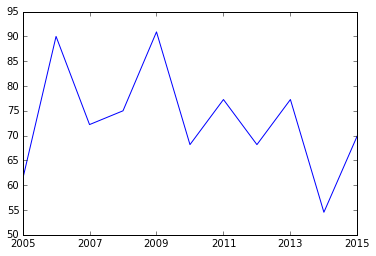

In [101]:
#very basic pandas plot
summary['Percent Won'].plot(kind='line')

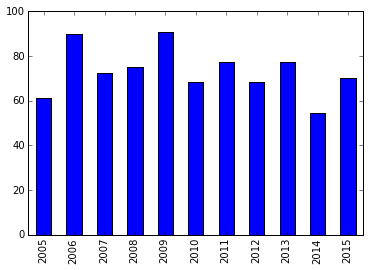

In [102]:
#matplotlib bar graph of win percentage
percents = pd.Series(summary['Percent Won'])
plt.figure()

percents.plot(kind='bar')

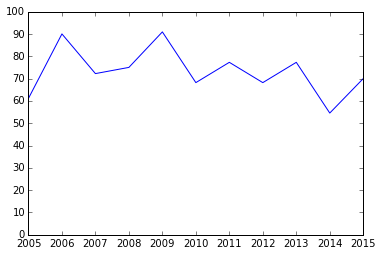

In [103]:
#better matplotlib of win percentage
x = range(0,len(years))
plt.xticks(x, years)

ps = range(0,110,10)

axes = plt.gca()
axes.set_ylim([0,100])
plt.yticks(ps)

percents.plot(kind='line')

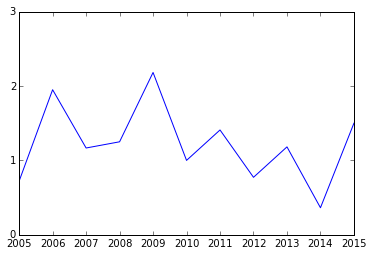

In [104]:
#matplotlib: average of each year for the net score differences
x = range(0,len(years))
plt.xticks(x, years)

ps = range(0,4,1)

axes = plt.gca()
axes.set_ylim([0,3])
plt.yticks(ps)

n = pd.Series(summary['Set Diff Avg'])

n.plot(kind='line')


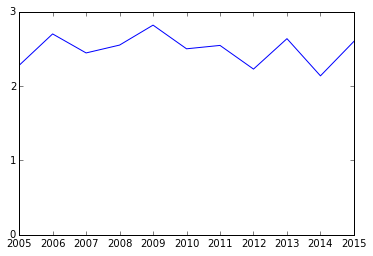

In [105]:
#matplotlib: average of each year for avg. UCSD score
x = range(0,len(years))
plt.xticks(x, years)

ps = range(0,4,1)

axes = plt.gca()
axes.set_ylim([0,3])
plt.yticks(ps)

n = pd.Series(summary['UCSD Sets Avg'])

n.plot(kind='line')

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]


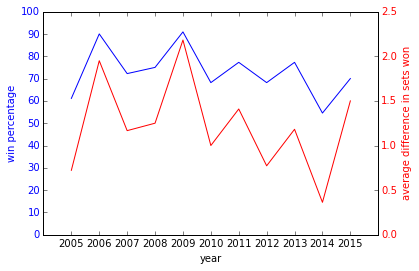

In [106]:
#s1 win percentage

fig, ax1 = plt.subplots()
t = np.arange(2005, 2016, 1)
s1 = summary['Percent Won'].values

ax1.plot(t, s1, 'b-')
ax1.set_xlabel('year')

# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('win percentage', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

years = [int(x) for x in years]
print(years)
    
x = range(0,len(years))

ps = range(0,110,10)

axes = plt.gca()
axes.set_ylim([0,100])
plt.yticks(ps)
    
ax2 = ax1.twinx()
s2 = summary['Set Diff Avg'].values

ax2.plot(t, s2, 'r-')
ax2.set_ylabel('average difference in sets won', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
ax1.set_xticks(years)
#ax2.set_xticks()    

plt.show()